In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("iris.csv")
df.drop("variety", axis=1, inplace=True)
df.tail()

,sepal.length,sepal.width,petal.length,petal.width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [4]:
def standardization(colums, df):
    for columnName in colums :
        avgg = df[columnName].mean()
        stdd = df[columnName].std()
        indx = 0
        
        for i in df[columnName]:
            df[columnName][indx] = (i - avgg) / stdd
            indx += 1

In [5]:
standardization(["sepal.length", "sepal.width", "petal.length", "petal.width"], df)
df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [6]:
def coVariance(df):
    return df.cov()

In [7]:
covMat = coVariance(df)

In [8]:
eigenvalues,eigenvectors = np.linalg.eig(covMat)

In [9]:
eig_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]

In [10]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [14]:
eig_pairs

[(2.9184978165319957,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9140304714680705,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14675687557131534,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020714836428619206,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [32]:
N = 2  
top_eigenvalues = [eig_pairs[i][0] for i in range(N)]
top_eigenvectors = np.column_stack([eig_pairs[i][1] for i in range(N)])


In [19]:
pca_data = np.dot(df, top_eigenvectors)
print("Transformed data ", pca_data.shape)

Transformed data  (150, 2)


In [20]:
pca_data

array([[-2.25714118, -0.47842383],
       [-2.07401302,  0.67188269],
       [-2.35633511,  0.34076642],
       [-2.29170679,  0.59539986],
       [-2.3818627 , -0.64467566],
       [-2.06870061, -1.4842053 ],
       [-2.43586845, -0.04748512],
       [-2.22539189, -0.222403  ],
       [-2.32684533,  1.1116037 ],
       [-2.17703491,  0.46744757],
       [-2.15907699, -1.04020587],
       [-2.31836413, -0.132634  ],
       [-2.2110437 ,  0.72624318],
       [-2.62430902,  0.95829635],
       [-2.19139921, -1.85384655],
       [-2.25466121, -2.67731523],
       [-2.20021676, -1.47865573],
       [-2.18303613, -0.48720613],
       [-1.89223284, -1.40032757],
       [-2.33554476, -1.1240836 ],
       [-1.90793125, -0.40749058],
       [-2.19964383, -0.92103587],
       [-2.76508142, -0.4568133 ],
       [-1.81259716, -0.08527285],
       [-2.21972701, -0.13679618],
       [-1.9453293 ,  0.62352971],
       [-2.04430277, -0.24135499],
       [-2.1613365 , -0.52538942],
       [-2.13241965,

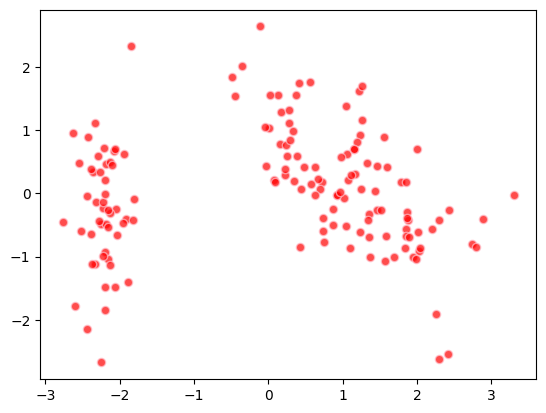

In [31]:
plt.scatter(pca_data[:,0],pca_data[:,1],alpha=0.7,edgecolors="pink",c='red')